In [28]:
from google.colab import drive

In [29]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Pepper Disease Model",shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE)

In [ ]:
class_names=dataset.class_names
class_names

In [ ]:
len(dataset)

78

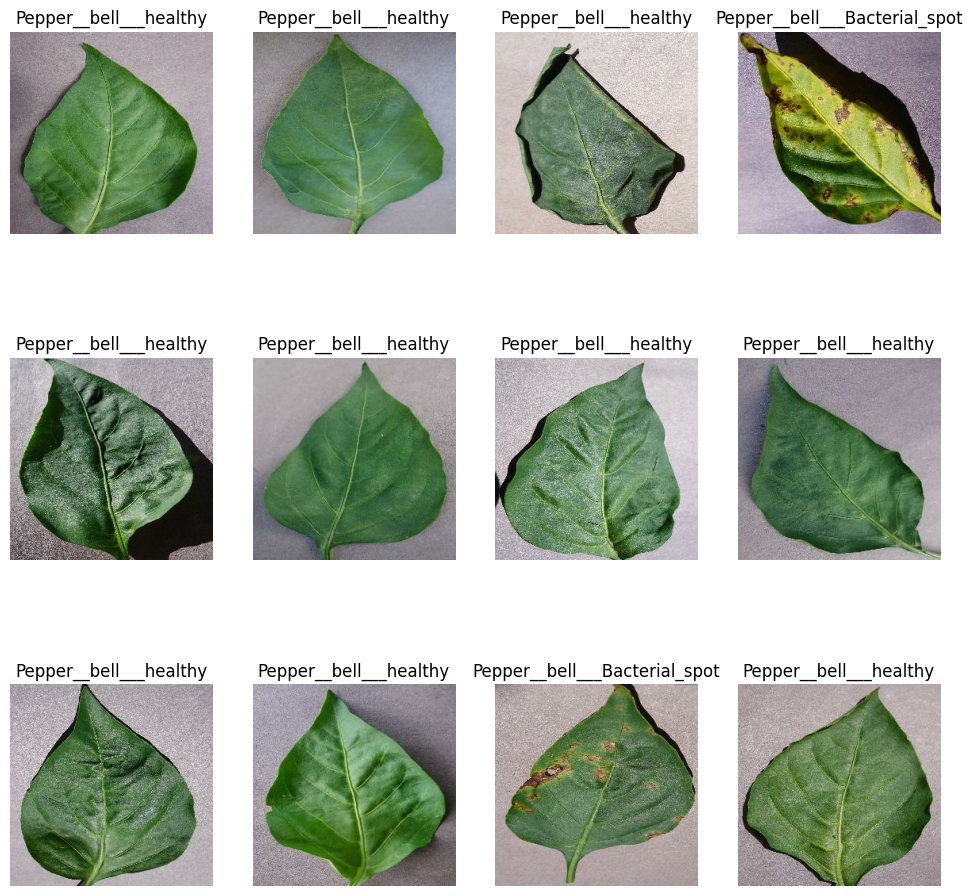

In [ ]:
plt.figure(figsize=(12,12))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [ ]:
len(dataset)

78

In [ ]:
train_size=0.8
len(dataset)*train_size

62.400000000000006

In [ ]:
train_ds=dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds=dataset.skip(54)
len(test_ds)

24

In [ ]:
val_size=0.1
len(dataset)*val_size

7.800000000000001

In [ ]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds=test_ds.skip(6)
len(test_ds)

18

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):

  ds_size=len(ds)

  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)

  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)

  train_ds=ds.take(train_size)

  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds= get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

62

In [ ]:
len(val_ds)

7

In [ ]:
len(test_ds)

9

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale= tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE,CHANNELS)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    ])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [31]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
62/62 [==============================] - 14s 217ms/step - loss: 1.4450 - accuracy: 0.5909 - val_loss: 0.8314 - val_accuracy: 0.4330
Epoch 2/50
62/62 [==============================] - 5s 78ms/step - loss: 0.4869 - accuracy: 0.7835 - val_loss: 0.5365 - val_accuracy: 0.7232
Epoch 3/50
62/62 [==============================] - 4s 69ms/step - loss: 0.6370 - accuracy: 0.6689 - val_loss: 0.5797 - val_accuracy: 0.7009
Epoch 4/50
62/62 [==============================] - 4s 65ms/step - loss: 0.5533 - accuracy: 0.7315 - val_loss: 0.3232 - val_accuracy: 0.8571
Epoch 5/50
62/62 [==============================] - 4s 65ms/step - loss: 0.3382 - accuracy: 0.8706 - val_loss: 0.7637 - val_accuracy: 0.7812
Epoch 6/50
62/62 [==============================] - 4s 71ms/step - loss: 0.3281 - accuracy: 0.9124 - val_loss: 0.3298 - val_accuracy: 0.8884
Epoch 7/50
62/62 [==============================] - 4s 67ms/step - loss: 0.1619 - accuracy: 0.9465 - val_loss: 0.2935 - val_accuracy: 0.8795
Epoch 8/50


In [ ]:
scores=model.evaluate(test_ds)

In [ ]:
history

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [33]:
np.argmax([9.9307102e-01 ,6.9289189e-03, 7.2559146e-14])

0

first image to predict
actual label: Pepper__bell___healthy
1/1 [==============================] - 0s 161ms/step
predicted label: Pepper__bell___healthy


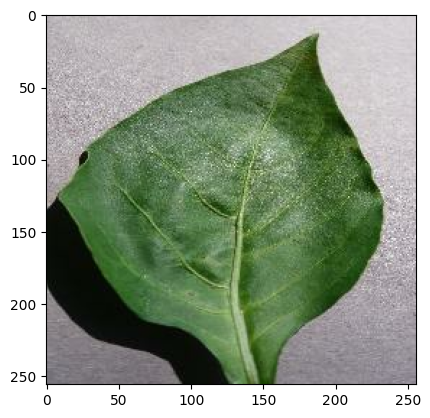

In [32]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

  first_image=images_batch[0].numpy().astype('uint8')
  first_label=labels_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:",class_names[ first_label])

  batch_prediction=model.predict(images_batch)
  print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [34]:
def predict(model, img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)

  predictions=model.predict(img_array)

  predicted_class=class_names[np.argmax(predictions[0])]
  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

1/1 [==============================] - 0s 17ms/step


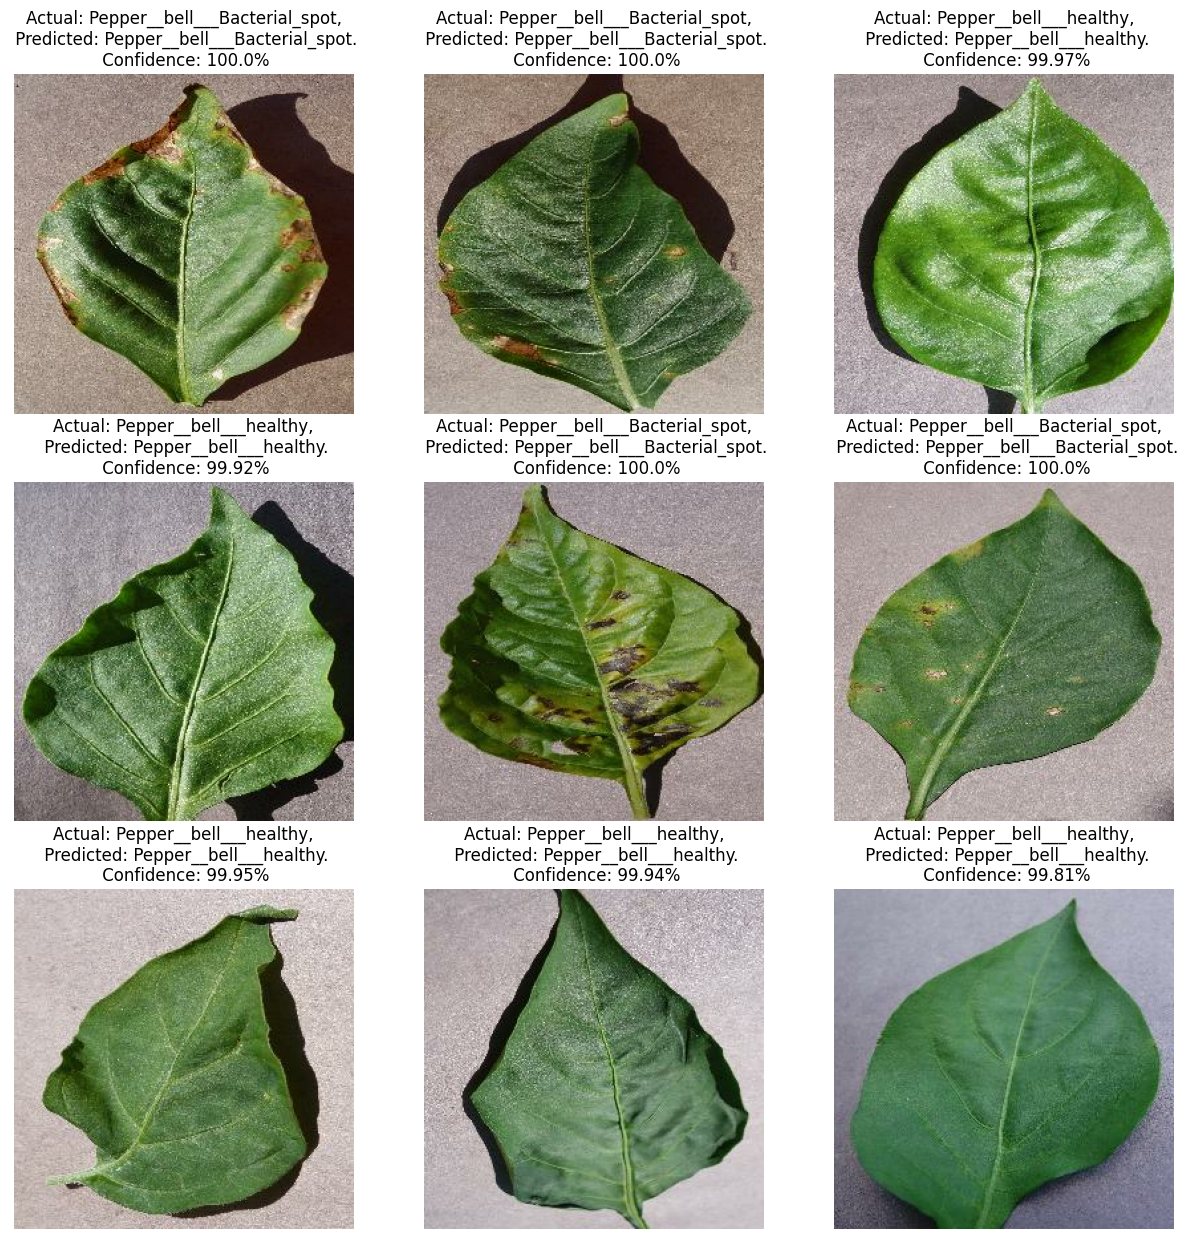

In [35]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class,confidence=predict(model, images[i].numpy())
    actual_class=class_names[labels[i]]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

    plt.axis("off")

1/1 [==============================] - 0s 31ms/step


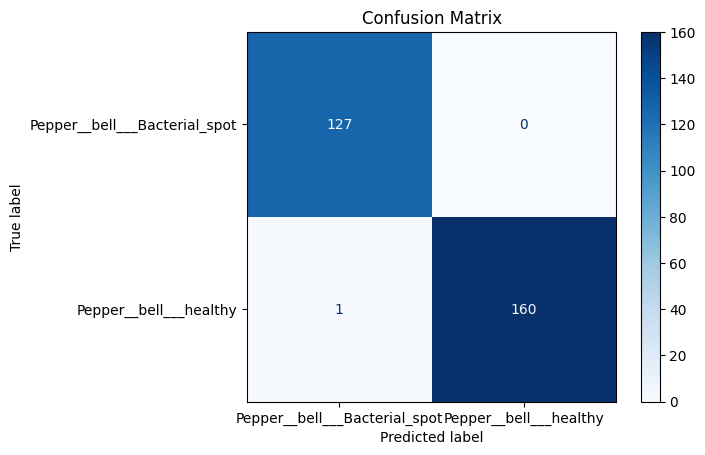

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
predictions = []
true_labels = []
for images, labels in test_ds:
    true_labels.extend(labels.numpy())
    predictions.extend(np.argmax(model.predict(images), axis=-1))


conf_matrix = confusion_matrix(true_labels, predictions)


labels = class_names
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()